In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

###Read data

In [2]:
dataset = pd.read_csv('/content/experiments.csv')

In [3]:
dataset[:2]

,index,x,y
0,0,1.689478,4.374367
1,1,-3.082399,3.479117


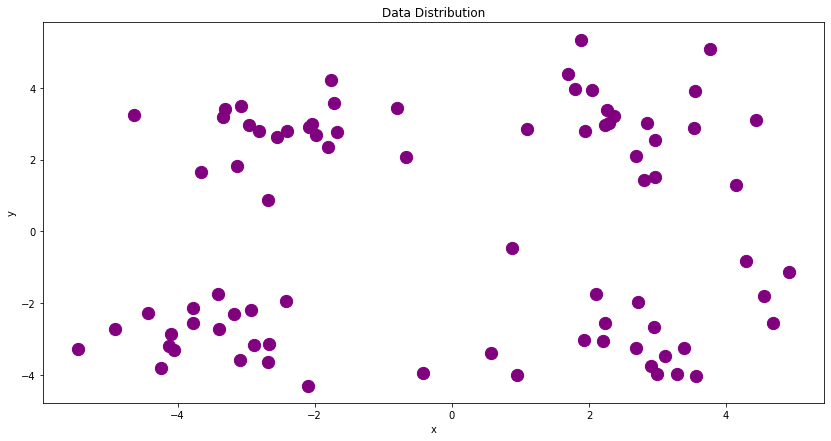

In [4]:
plt.figure(figsize=(14,7)) 
plt.scatter(dataset["x"],dataset["y"], color="purple", s=150)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Distribution')
plt.show()

The following are asteroids' dimensions. The task is to cluster these objects into groups.

The intent is to compare 4 different clustering algorithms.

Drop index

In [5]:
dataset=dataset.drop(dataset.columns[0], axis=1)

Check for missing data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       80 non-null     float64
 1   y       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


###Feature selection.

We do not have mant to choose from.

In [7]:
X = dataset.iloc[:,[0,1]].values

###Implement K_means as a baseline.

In [8]:
dist=[]
lst = [1,2,3,4,5,6,7,8,9,10,11]
for i in lst:
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=61)
  kmeans.fit(X)
  dist.append(kmeans.inertia_)

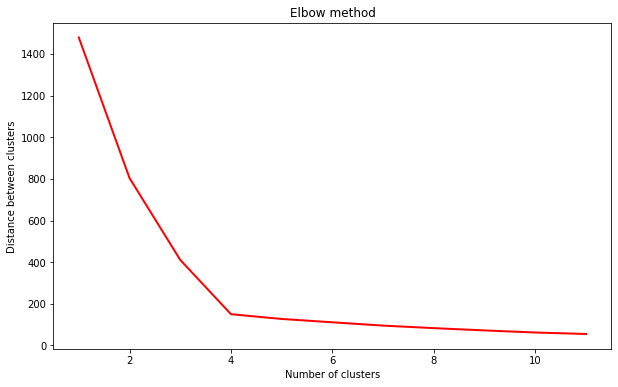

In [9]:
plt.figure(figsize=(10,6)) 
plt.plot(lst, dist, color='r', lw=2)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distance between clusters')
plt.show()

Optimal number of clusters is 4.


In [10]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
np.unique(y_kmeans)

array([0, 1, 2, 3], dtype=int32)

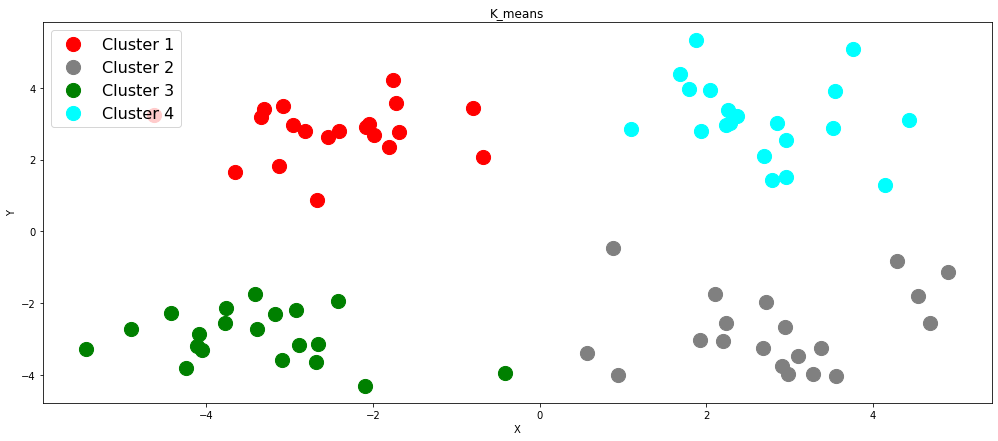

In [11]:
plt.figure(figsize=(17,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 200, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 200, c = 'gray', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 200, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 200, c = 'cyan', label = 'Cluster 4')
plt.title('K_means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left',prop={'size': 16})
plt.show()

I use silhouette score for clustering validation.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

In [12]:
k_means_score=round(metrics.silhouette_score(X, y_kmeans),4)*100
print("Silhouette score =",k_means_score,"%")

Silhouette score = 65.66 %


###MeanShift

In [13]:
meanShift = MeanShift(bandwidth=2).fit(X)
print("Objects have been divided in", len(np.unique(meanShift.labels_)),"clusters.")

Objects have been divided in 5 clusters.


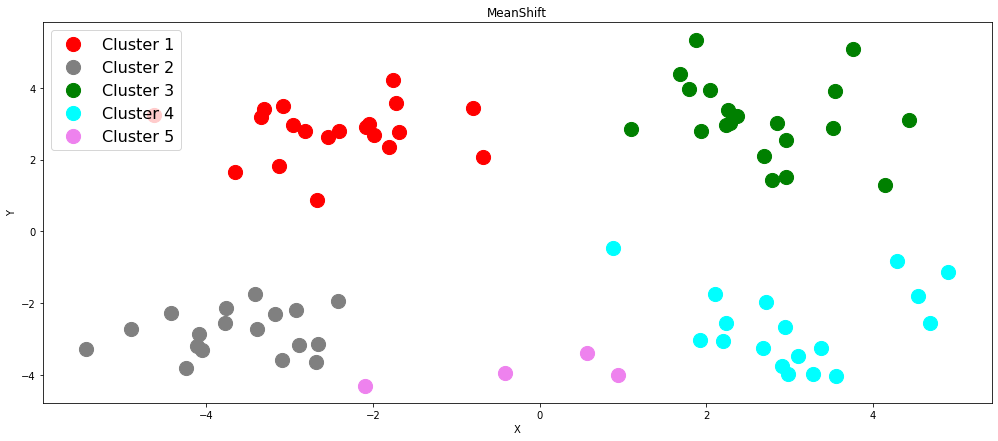

In [14]:
plt.figure(figsize=(17,7))
plt.scatter(X[meanShift.labels_ == 0, 0], X[meanShift.labels_ == 0, 1], s = 200, c = 'red', label = 'Cluster 1')
plt.scatter(X[meanShift.labels_ == 1, 0], X[meanShift.labels_ == 1, 1], s = 200, c = 'gray', label = 'Cluster 2')
plt.scatter(X[meanShift.labels_ == 2, 0], X[meanShift.labels_ == 2, 1], s = 200, c = 'green', label = 'Cluster 3')
plt.scatter(X[meanShift.labels_ == 3, 0], X[meanShift.labels_ == 3, 1], s = 200, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[meanShift.labels_ == 4, 0], X[meanShift.labels_ == 4, 1], s = 200, c = 'violet', label = 'Cluster 5')
plt.title('MeanShift')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left',prop={'size': 16})
plt.show()

In [15]:
meanShift_score=round(metrics.silhouette_score(X, meanShift.labels_),4)*100
print("Silhouette score =",meanShift_score,"%")

Silhouette score = 59.27 %


###DBSCAN

In [16]:
DBScan = DBSCAN(eps=1.9, min_samples=5).fit(X)
print("Objects have been divided in", len(np.unique(DBScan.labels_)),"clusters.")

Objects have been divided in 4 clusters.


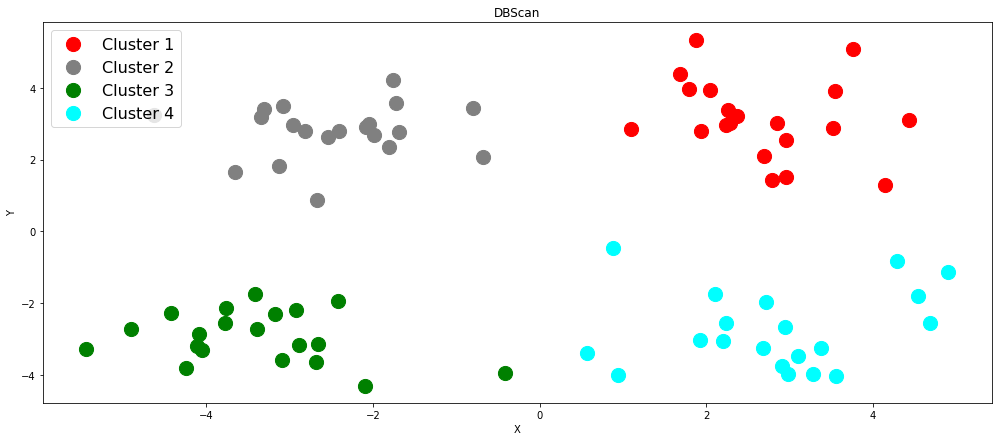

In [17]:
plt.figure(figsize=(17,7))
plt.scatter(X[DBScan.labels_ == 0, 0], X[DBScan.labels_ == 0, 1], s = 200, c = 'red', label = 'Cluster 1')
plt.scatter(X[DBScan.labels_ == 1, 0], X[DBScan.labels_ == 1, 1], s = 200, c = 'gray', label = 'Cluster 2')
plt.scatter(X[DBScan.labels_ == 2, 0], X[DBScan.labels_ == 2, 1], s = 200, c = 'green', label = 'Cluster 3')
plt.scatter(X[DBScan.labels_ == 3, 0], X[DBScan.labels_ == 3, 1], s = 200, c = 'cyan', label = 'Cluster 4')
plt.title('DBScan')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left',prop={'size': 16})
plt.show()

In [18]:
DBScan_score=round(metrics.silhouette_score(X, DBScan.labels_),4)*100
print("Silhouette score =",DBScan_score,"%")

Silhouette score = 65.66 %


###Gaussian Mixture

In [19]:
gmm = GaussianMixture(n_components=4, covariance_type='full', init_params='random', random_state=5).fit(X)
gmm_labels = gmm.predict(X)
probs = gmm.predict_proba(X)
np.unique(gmm_labels)

array([0, 1, 2, 3])

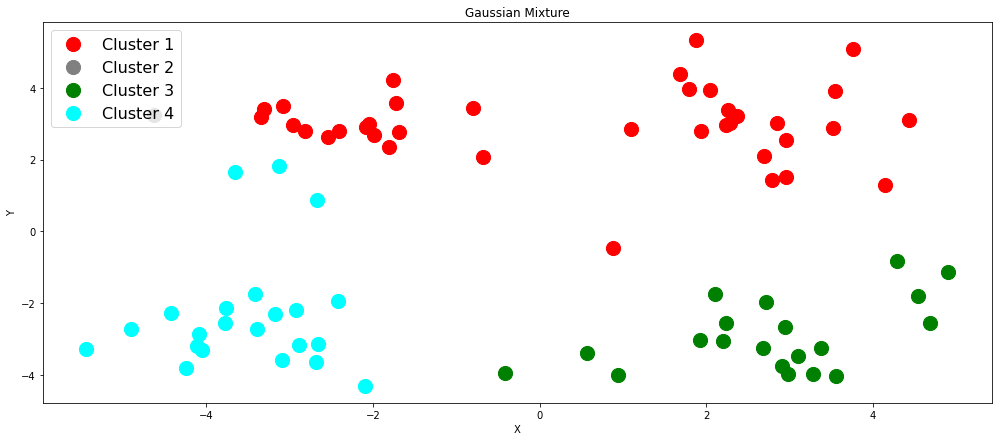

In [20]:
plt.figure(figsize=(17,7))
plt.scatter(X[gmm_labels == 0, 0], X[gmm_labels == 0, 1], s = 200, c = 'red', label = 'Cluster 1')
plt.scatter(X[gmm_labels == 1, 0], X[gmm_labels == 1, 1], s = 200, c = 'gray', label = 'Cluster 2')
plt.scatter(X[gmm_labels == 2, 0], X[gmm_labels == 2, 1], s = 200, c = 'green', label = 'Cluster 3')
plt.scatter(X[gmm_labels == 3, 0], X[gmm_labels == 3, 1], s = 200, c = 'cyan', label = 'Cluster 4')
plt.title('Gaussian Mixture')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left',prop={'size': 16})
plt.show()

In [21]:
gmm_score=round(metrics.silhouette_score(X, gmm_labels),4)*100
print("Silhouette score =", gmm_score,"%")

Silhouette score = 36.65 %


###Conclusion

In [22]:
d = {'Method': ["k-means", "mean shift", "DBSCAN", "GMM"], 'Score': [k_means_score, meanShift_score, DBScan_score, gmm_score]}
df = pd.DataFrame(data=d)

In [23]:
df

,Method,Score
0,k-means,65.66
1,mean shift,59.27
2,DBSCAN,65.66
3,GMM,36.65


K-means is a great algorithm to start from and the best with current dataset.

However, you should always check your data for outliners and distribution and base your algorithm selection on these factors.

Do not hesitate to leave your comments, suggestions, recommedndations.